# Lab 4: Supervised Learning II - Classification Models

In this lab, we will cover the following topics:
1. Classification models for binary outcomes:
    * k-NN, : based on the majority class of the k nearest neighbors.
    * decision trees: slit into branches (tree) (yes/no) (sick/not sick)
    * random forest, : collection of many trees
    * SVM  :line seperate the model and give us equal amount of data (finding the hyperlane) :Finds the optimal hyperplane that best separates two classes. 
2. Model evaluation: accuracy, precision, recall, F1 Score 
3. Hyperparameter tuning: Adjusting the settings of a model to improve performance

Each section includes basic implementation and questions for further exploration.


## 1. Classification Models for Binary Outcomes

We will start by implementing various classification models to predict binary outcomes. We will also explore different parameters and visualize the results.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42) #Generate a random n-class classification problem.
#n_smaples: Number of samples (rows)
#n_features: Number of input features (columns).
#n_classes: Number of classes (2 for binary classification).
#weights: Proportion of samples assigned to each class.
#random_state: Controls the randomness of the data generation for reproducibility.


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #slit the data into training and testing sets.


In [3]:
make_classification?

Signature:
make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
Docstring:
Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1)
about vertices of an ``n_informative``-dimensional hypercube with sides of
length ``2*class_sep`` and assigns an equal number of clusters to each
class. It introduces interdependence between these features and adds
various types of further noise to the data.

Without shuffling, ``X`` horizontally stacks features in the following
order: the primary ``n_informative`` features, followed by ``n_redundant``
linear combinations of the informative features, followed by ``n_repeated``
duplicates, drawn randomly with replacement from the infor

### 1.1 k-Nearest Neighbors (k-NN)
Next, we will implement a k-Nearest Neighbours classifier. We will also explore different parameters and visualize the results.

In [4]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

0.7246913580246913
[0.  0.2 0.4 0.6 1. ]


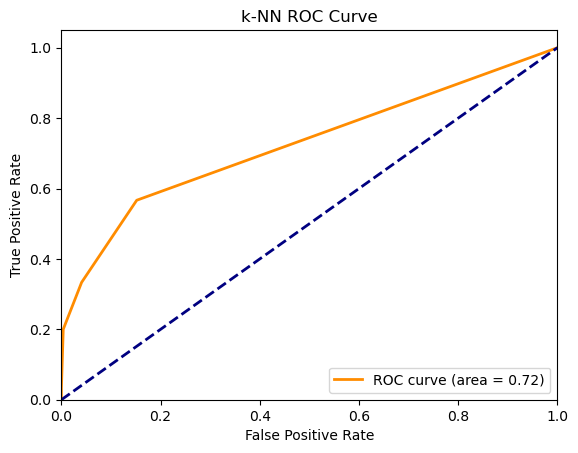

In [27]:
# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5) #Create a k-NN classifier with 30 neighbors and Manhattan distance metric.
knn.fit(X_train, y_train)

# Predict probabilities
y_scores_knn = knn.predict_proba(X_test)[:, 1] # Get the predicted probabilities for the positive class


# Compute ROC curve and ROC area
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
print(roc_auc_knn)

#extra__________
#Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_knn)
#  View the threshold values
print(thresholds)  # these are the possible cut-off values
#__________________________

# Plot ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('k-NN ROC Curve')
plt.legend(loc='lower right')
plt.show()


#### Questions for Exploration
   - How does scaling or reducing the number of features affect the performance of the k-NN classifier?
   -> Changing n_features affect the ROC curve and AUC : decrease number would increase performance (increase AUC score and better ROC), and vice versa 

   - What happens to the ROC curve and AUC score when you increase or decrease the number of neighbors?
   -> increase n_neighbors increase the performance of the k_NN as more neighbors to compare 

   - How does the choice of distance metric (e.g., Euclidean, Manhattan) impact the performance of the k-NN classifier?
   -> Manhattan increases perfomrance AUC increase 
   -> Euclidean does not impact much 

### 1.2 Decision Tree
Next, we will implement a Decision Tree classifier. We will also explore different parameters and visualize the results.

In [7]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

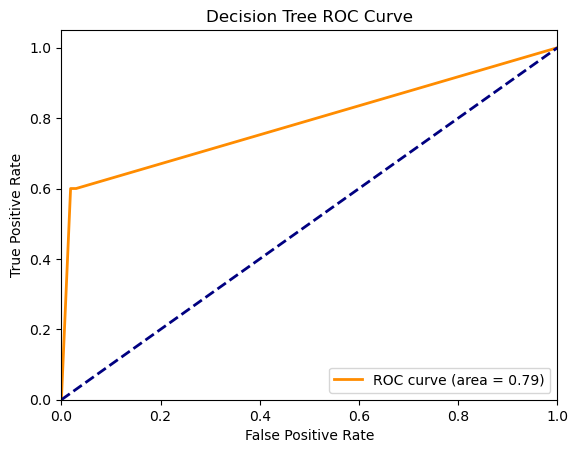

In [93]:
# Train a decision tree classifier
tree = DecisionTreeClassifier(random_state=42, min_samples_split=6) #Create a decision tree classifier with a maximum depth of 5.
tree.fit(X_train, y_train)

# Predict probabilities
y_scores_tree = tree.predict_proba(X_test)[:, 1] #predict_proba returns probabilities for each class, we take the second column for the positive class

# Compute ROC curve and ROC area
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_scores_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot ROC curve
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

#The peaks/jumps reflect the thresholds where the model changes its classification outcome based on its internal splits.

### Questions for Exploration
   - How does changing the maximum depth (`max_depth`) of the decision tree affect its performance?
   -> when the max_depth from range of 1-4, the deeper the tree the better ROC and AUC (increase threshold and area). when it hitsrange 5-8, the increase of depth worsen the performance. from 10 forward, the threshold(0.6)and AUC stay the same as default (0.79)

   - What is the impact of using different criteria for splitting (e.g., `gini`, `entropy`) on the decision tree's performance?
   -> not much impact. 

   - How does pruning the decision tree (by setting `min_samples_split` or `min_samples_leaf`) affect its performance and complexity?
   ->when adding min_sample_leaf, increasing the condition allows increase in AUC -> better model. One noticible change is the ROC curve, different min_sample_leaf condition, the "step"/"peak" (positive rate y) at x = 0.1 to 0.2 adjust. The ROC become more spteppy 
   -> min_sample_plit seems to not change anything on the performance

### 1.3 Random Forest
Next, we will implement a Random Forest classifier. We will also explore different parameters and visualize the results.

In [19]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

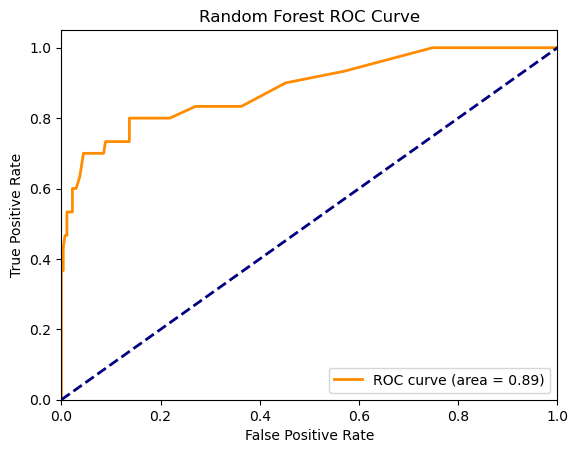

In [126]:
# Train a random forest classifier
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

# Predict probabilities
y_scores_forest = forest.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_scores_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)

# Plot ROC curve
plt.figure()
plt.plot(fpr_forest, tpr_forest, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_forest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Questions for Exploration
   - How does changing the number of trees (`n_estimators`) in the random forest affect its performance and stability?
   -> it seems to be more steepy ROC curve yet higher AUC score as n_estimators increase. The stability seems to be less as the ROC curve has the potential to approach the blue line (baseline) at many points 
   improves performance and stability

   - What is the impact of changing the maximum depth (`max_depth`) of the trees in the random forest?
   -> The AUC area slightly decrease, ROC curve have more steps thoughout
   can prevent overfitting but may reduce AUC and lead to coarser, stepped ROC curves due to simplified tree outputs

   - How does the random forest handle overfitting compared to a single decision tree?
   -> increase in random state , AUC seemed to stay constant, ROC curve have more steps at the beginning 
   Random Forest is more resistant to overfitting due to averaging across trees.

### 1.4 Support Vector Machine (SVM)
Next, we will implement a Support Vector Machine classifier (SVC). We will also explore different parameters and visualize the results.

In [21]:
SVC?

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

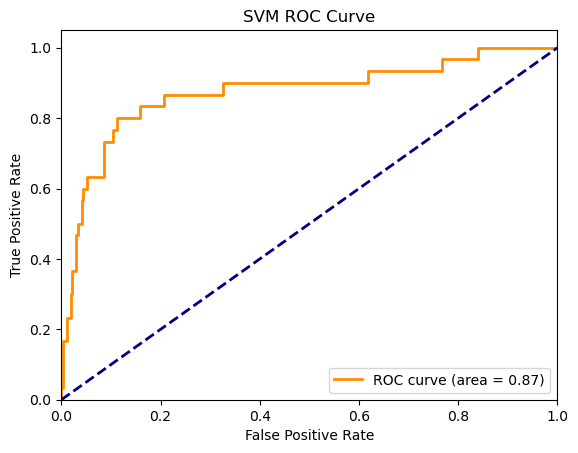

In [22]:
# Train an SVM classifier
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict probabilities
y_scores_svm = svm.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Questions for Exploration
   - How does changing the regularization parameter (`C`) affect the performance of the SVM classifier?
   - What is the impact of using different kernel functions (e.g., `linear`, `rbf`, `poly`) on the SVM's performance?
   - How does the choice of kernel parameters (e.g., `gamma` for the RBF kernel) influence the SVM's decision boundary?

## 2. Model Evaluation

We will evaluate the models using various metrics such as accuracy, precision, recall, F1 score, and ROC AUC.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the models
models = {'k-NN': knn, 'Decision Tree': tree, 'Random Forest': forest, 'SVM': svm} #differenciate objects by name earlier already
# {'name' : 'model'} ____ dictionary 

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


k-NN - Accuracy: 0.92, Precision: 0.86, Recall: 0.20, F1 Score: 0.32
Decision Tree - Accuracy: 0.94, Precision: 0.72, Recall: 0.60, F1 Score: 0.65
Random Forest - Accuracy: 0.94, Precision: 0.83, Recall: 0.50, F1 Score: 0.62
SVM - Accuracy: 0.91, Precision: 0.60, Recall: 0.30, F1 Score: 0.40


### Questions for Exploration
   - How do the accuracy, precision, recall, and F1 score compare across different classifiers?
   - What are the trade-offs between precision and recall for each classifier, and how can you visualize these trade-offs using Precision-Recall curves?
   - How does the class imbalance in the dataset affect the evaluation metrics, and what techniques can be used to address this imbalance?

## 3. Hyperparameter Tuning

We will perform hyperparameter tuning using grid search to find the best parameters for each model.

In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]} #decide which n_neighbors work best
param_grid_tree = {'max_depth': [None, 10, 20, 30]} #decide which max_depth works best
param_grid_forest = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]} #number of trees and their depth
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']} #

# Perform grid search
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy') #cv = cross-validation explains how many times the data is split into training and testing sets
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='accuracy')
grid_search_forest = GridSearchCV(RandomForestClassifier(), param_grid_forest, cv=5, scoring='accuracy')
grid_search_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy') #differenciate SVM by probability=True to get probabilities for ROC curve

grid_search_knn.fit(X_train, y_train)
grid_search_tree.fit(X_train, y_train)
grid_search_forest.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)

# Print best parameters and scores
print(f"Best parameters for k-NN: {grid_search_knn.best_params_}")
print(f"Best score for k-NN: {grid_search_knn.best_score_}")

print(f"Best parameters for Decision Tree: {grid_search_tree.best_params_}")
print(f"Best score for Decision Tree: {grid_search_tree.best_score_}")

print(f"Best parameters for Random Forest: {grid_search_forest.best_params_}")
print(f"Best score for Random Forest: {grid_search_forest.best_score_}")

print(f"Best parameters for SVM: {grid_search_svm.best_params_}")
print(f"Best score for SVM: {grid_search_svm.best_score_}")


Best parameters for k-NN: {'n_neighbors': 5}
Best score for k-NN: 0.9228571428571429
Best parameters for Decision Tree: {'max_depth': 10}
Best score for Decision Tree: 0.9414285714285715
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Best score for Random Forest: 0.9557142857142857
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best score for SVM: 0.9442857142857143


### Questions for Exploration
   - How does hyperparameter tuning using grid search improve the performance of each classifier?
   - What are the best hyperparameters found for each classifier, and how do they compare to the default parameters?
   - How does the choice of cross-validation strategy (e.g., k-fold, stratified k-fold) impact the results of hyperparameter tuning?

## Extensions

1. **Feature Importance**
  * For tree-based models (decision tree and random forest), which features are the most important, and how can you visualize feature importance?
  * How does feature scaling (e.g., standardization, normalization) affect the performance of other distance-based classifiers (i.e., SVM)?

2. **Model Comparison**
  * Compare the performance of all classifiers on the same dataset using a single evaluation metric (e.g., ROC AUC) and visualize the results.
  * How do the classifiers perform on different types of datasets (e.g., datasets with different levels of noise, feature correlations)?